In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import LearningRateScheduler
from resnets_utils import *
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os
from ResNet50 import ResNet50
%matplotlib inline

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# normalization with the per-pixel mean substracted
X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [3]:
# a learning rate scheduler to change the learning rate
def my_schedule(epoch):
    if epoch > 180:
        learning_rate = 5e-7
    elif epoch > 160:
        learning_rate = 1e-6
    elif epoch > 120:
        learning_rate = 1e-5
    elif epoch > 80:
        learning_rate = 1e-4
    else:
        learning_rate = 1e-3
    print('Learning rate: ', learning_rate)
    return learning_rate

scheduler = LearningRateScheduler(my_schedule)

## DATA AUGMENTATION

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.0)

model = ResNet50(input_shape = (64, 64, 3), classes = 6)
model.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                              epochs = 300, 
                              validation_data=(X_test, Y_test),
                              callbacks=[scheduler])

Learning rate:  0.001
Learning rate:  0.001
Epoch 1/300
34/34 [==============================] - 9s 272ms/step - loss: 2.1029 - accuracy: 0.3306 - val_loss: 13.5157 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 2/300
34/34 [==============================] - 6s 183ms/step - loss: 1.3477 - accuracy: 0.4944 - val_loss: 13.5157 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 3/300
34/34 [==============================] - 6s 181ms/step - loss: 1.0097 - accuracy: 0.6139 - val_loss: 13.5157 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 4/300
34/34 [==============================] - 6s 184ms/step - loss: 0.8085 - accuracy: 0.7111 - val_loss: 13.5157 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 5/300
34/34 [==============================] - 6s 187ms/step - loss: 0.6152 - accuracy: 0.7731 - val_loss: 12.9393 - val_accuracy: 0.1667
Learning rate:  0.001
Epoch 6/300
34/34 [==============================] - 6s 185ms/step - loss: 0.4529 - accuracy: 0.8435 - val_loss: 10.8435 - val

34/34 [==============================] - 6s 178ms/step - loss: 0.1118 - accuracy: 0.9583 - val_loss: 0.0592 - val_accuracy: 0.9917
Learning rate:  0.001
Epoch 51/300
34/34 [==============================] - 6s 180ms/step - loss: 0.0878 - accuracy: 0.9694 - val_loss: 0.0658 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 52/300
34/34 [==============================] - 6s 182ms/step - loss: 0.0806 - accuracy: 0.9704 - val_loss: 0.0623 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 53/300
34/34 [==============================] - 6s 181ms/step - loss: 0.0902 - accuracy: 0.9750 - val_loss: 0.1006 - val_accuracy: 0.9833
Learning rate:  0.001
Epoch 54/300
34/34 [==============================] - 6s 183ms/step - loss: 0.1562 - accuracy: 0.9574 - val_loss: 0.1670 - val_accuracy: 0.9583
Learning rate:  0.001
Epoch 55/300
34/34 [==============================] - 6s 183ms/step - loss: 0.0803 - accuracy: 0.9694 - val_loss: 0.1331 - val_accuracy: 0.9750
Learning rate:  0.001
Epoch 56/300
34/3

34/34 [==============================] - 6s 183ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0542 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 149/300
34/34 [==============================] - 6s 179ms/step - loss: 0.0988 - accuracy: 0.9769 - val_loss: 0.0530 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 150/300
34/34 [==============================] - 6s 178ms/step - loss: 0.0576 - accuracy: 0.9796 - val_loss: 0.0517 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 151/300
34/34 [==============================] - 6s 179ms/step - loss: 0.0539 - accuracy: 0.9861 - val_loss: 0.0517 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 152/300
34/34 [==============================] - 6s 182ms/step - loss: 0.0936 - accuracy: 0.9741 - val_loss: 0.0545 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 153/300
34/34 [==============================] - 6s 181ms/step - loss: 0.0407 - accuracy: 0.9861 - val_loss: 0.0551 - val_accuracy: 0.9833
Learning rate:  1e-05
Epoch 154/30

34/34 [==============================] - 6s 181ms/step - loss: 0.0746 - accuracy: 0.9796 - val_loss: 0.0516 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 247/300
34/34 [==============================] - 6s 188ms/step - loss: 0.1045 - accuracy: 0.9759 - val_loss: 0.0513 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 248/300
34/34 [==============================] - 6s 186ms/step - loss: 0.0514 - accuracy: 0.9815 - val_loss: 0.0515 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 249/300
34/34 [==============================] - 6s 185ms/step - loss: 0.0502 - accuracy: 0.9880 - val_loss: 0.0513 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 250/300
34/34 [==============================] - 6s 185ms/step - loss: 0.0892 - accuracy: 0.9824 - val_loss: 0.0511 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 251/300
34/34 [==============================] - 6s 182ms/step - loss: 0.0645 - accuracy: 0.9870 - val_loss: 0.0516 - val_accuracy: 0.9833
Learning rate:  5e-07
Epoch 252/30

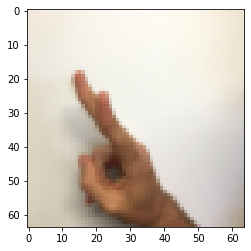

1
2


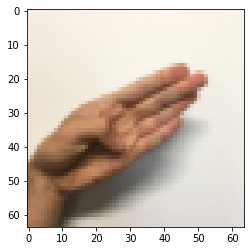

2
4


In [5]:
import matplotlib.pyplot as plt

for i in range(120):
    img = X_test_orig[i]
    t = img/255
    t -= X_train_mean
    t = np.expand_dims(t, axis=0)
    if np.argmax(model.predict(t)) == np.argmax(Y_test[i]):
        continue
    img = image.array_to_img(img)
    plt.imshow(img)
    plt.show()
    print(np.argmax(model.predict(t)))
    print(np.argmax(Y_test[i]))

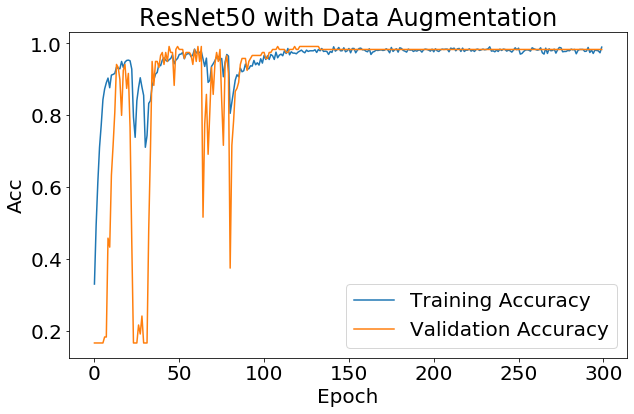

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig,ax = plt.subplots(1,1,figsize=(10,6))

ax.plot(acc, label='Training Accuracy')
ax.plot(val_acc, label='Validation Accuracy')

ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Acc', fontsize=20)
ax.set_title('ResNet50 with Data Augmentation', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=4, fontsize=20)

plt.show()